In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('E:\python\imdb_dataset.csv')

In [49]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [50]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [51]:
df['sentiment'].value_counts()



negative    25000
positive    25000
Name: sentiment, dtype: int64

In [52]:
import string
import re
# removing the html tags
def clean_html(text):
    clean=re.compile('<.*?>')
    cleantext=re.sub(clean,'',text)
    return cleantext
    
# first round of cleaning
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

# second round of cleaning
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text
    
cleaned_html=lambda x:clean_html(x)
cleaned1=lambda x:clean_text1(x)
cleaned2=lambda x:clean_text2(x)

df['review']=pd.DataFrame(df.review.apply(cleaned_html))
df['review']=pd.DataFrame(df.review.apply(cleaned1))
df['review']=pd.DataFrame(df.review.apply(cleaned2))

In [53]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [54]:
# label encoding for sentiment column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['sentiment']= label_encoder.fit_transform(df['sentiment'])
  
df['sentiment'].unique()

array([1, 0])

In [55]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [56]:
# NULL values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [57]:
X = df['review']
Y = df['sentiment']

logistics regression

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.25, random_state=24)

In [59]:
# count vectoriztion
# count vectorizer to vectorize the text data in the review column
from sklearn.feature_extraction.text import CountVectorizer
# creating instance of countvectorizer
cv = CountVectorizer()

In [60]:
#Vectorizing the text data
vec = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
#Training the model
lr = LogisticRegression()
lr.fit(vec, y_train)

c:\Users\Vishwayush\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
#Accuracy score
lr_score = lr.score(X_test_dtm, y_test)
print("Results for Logistic Regression with CountVectorizer")
print(lr_score)


Results for Logistic Regression with CountVectorizer
0.88616


In [63]:
#Predicting the labels for test data

y_pred_lr = lr.predict(X_test_dtm)

In [64]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[5546,  765],
       [ 658, 5531]], dtype=int64)

In [65]:
x = '''A waste of time film with a dash of over the top action sequences.
The movie sole purpose seems to be to showcase done to death martial arts of tiger with a good amount of bad CGI n rope work.'''
X_test_dtm = cv.transform([x])


In [66]:
y_pred_lr = lr.predict(X_test_dtm)
y_pred_lr

array([0])

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

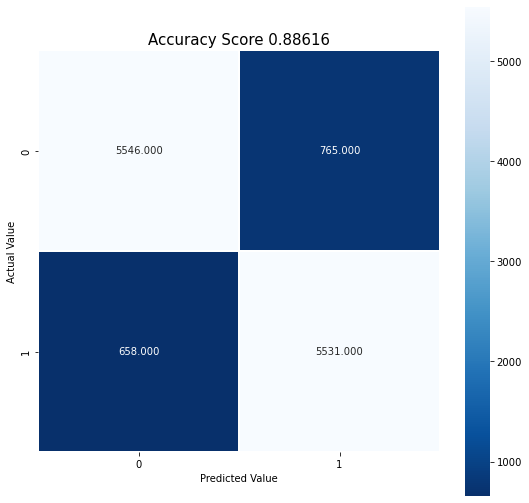

In [68]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_lr,annot=True,square=True,fmt='.3f',linewidth=.5,cmap='Blues_r')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
all_sample_title = 'Accuracy Score {0}'.format(lr_score)
plt.title(all_sample_title,size=15)
plt.show()

In [69]:
# pip install wordcloud

In [70]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

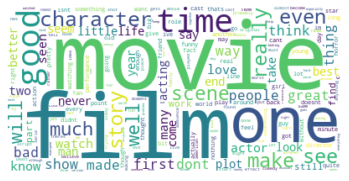

In [71]:
#Creating the text variable

text2 = " ".join(title for title in df.review)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
new_vec = tf.fit_transform(X_train)
X_test_dtm = tf.transform(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression
#Training the model
lr = LogisticRegression()
lr.fit(new_vec, y_train)

LogisticRegression()

In [74]:
#Accuracy score
lr_score = lr.score(X_test_dtm, y_test)
print("Results for Logistic Regression with tfid")
print(lr_score)

Results for Logistic Regression with tfid
0.89296


In [75]:
#Predicting the labels for test data

y_pred_lr = lr.predict(X_test_dtm)

In [76]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[5555,  756],
       [ 582, 5607]], dtype=int64)

In [85]:
x = '''this movie has no story plot , really bad experience , you should not watch this !!'''
X_test_dtm = cv.transform([x])

In [86]:
y_pred_lr = lr.predict(X_test_dtm)
y_pred_lr

array([0])

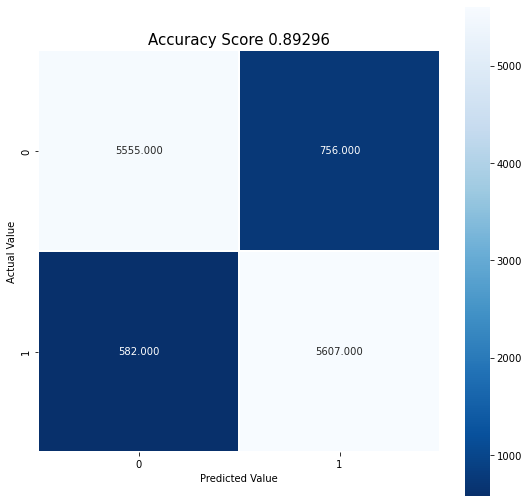

In [79]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_lr,annot=True,square=True,fmt='.3f',linewidth=.5,cmap='Blues_r')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
all_sample_title = 'Accuracy Score {0}'.format(lr_score)
plt.title(all_sample_title,size=15)
plt.show()

(-0.5, 399.5, 199.5, -0.5)

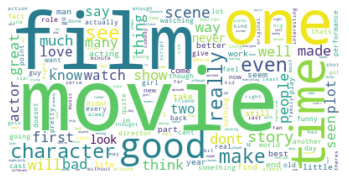

In [80]:
#Creating the text variable

text2 = " ".join(title for title in df.review)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")